# Lab 10: Image Formation

### Due November 13th, 2021 11:59 PM CST

#### Logistics and Lab Submission

See the [course website](https://courses.engr.illinois.edu/ece365/fa2019/logisticsvvv.html).

#### What You Will Need To Know For This Lab

This lab covers:

- 2D/3D rotation matrics
- Rotating an image (2D) or a volume (3D)
- Fourier and inverse Fourier transforms (on general grids)
- Central Slice Theorem (CST)
- Projection model in X-ray tomography

The submission procedure is provided below:
- You will be provided with a template Python script (main.py) for this lab where you need to implement the provided functions as needed for each question. Follow the instructions provided in this Jupyter Notebook (.ipynb) to implement the required functions. **Do not change the file name or the function headers!**
- Upload only your Python script (.py file) on Gradescope. Don't upload your datasets or Jupyter Notebook (.ipynb file).
- Your grades and feedbacks will appear on Gradescope. The grading for the programming questions is automated using Gradescope autograder, no partial credits are given. Therefore, if you wish, you will have a chance to re-submit your code **within 72 hours** of receiving your first grade for this lab, only if you have *reasonable* submissions before the deadline (i.e. not an empty script).
- If you re-submit, the final grade for the programming part of this lab will be calculated as .4 \* first_grade + .6 \* .9 \* re-submission_grade.

The purpose of problems titled `Visualization` are to better understand and test your results visually. `Visualization` problems will <b>NOT</b> be graded.

## Please type all your answers in *main.py*! You only need to submit *main.py*.

#### Preamble (Don't change this)

In [1]:
%pylab inline
import numpy as np
import scipy.spatial.distance as dist
from scipy import stats
from skimage.transform import radon, rescale, resize
from skimage.data import shepp_logan_phantom

Populating the interactive namespace from numpy and matplotlib


This line runs your python script that you are going to submit. Objects are created for your reference. You can copy-paste this box so you don't need to come up later. **Do not change the file name!**

In [2]:
%run main.py
q1 = Question1()
q2 = Question2()
q3 = Question3()
q4 = Question4()

## Problem 1 : 2D Rotation (15 points)

In this section, you will implement 2D rotation matrices and use them to rotate a set of points in 2D. 

Rotation matrices are transformation matrices that are used for rotation in Euclidean spaces. A 2D rotation matrix $R_\theta$ is a $2 \times 2$ matrix rotating a point $x \in \mathbb{R}^2$ by $\theta$ $\textbf{radians}$ around the origin:

\begin{align}
R_\theta =   
\begin{bmatrix}
    \cos \theta & -\sin \theta \\
     \sin \theta & \cos \theta
\end{bmatrix}.
\label{eq:rot_2d}
\tag 1
\end{align}

Note that, $R_\theta$ is an orthogonal matrix (i.e. $R_\theta ^T R_\theta = I$) with determinant $1$. To rotate a point $x$, all you need to do is to multiply $x$ by $R_\theta$. Also, for $\theta > 0$ the rotation around the origin is counter clockwise while for $\theta < 0$ this rotation is clockwise.

### Problem 1-1 Create rotation matrix (5 points)
Based on these definitions, write a function which takes one parameter $\theta$ (rotation angle <b>in degrees</b>) and outputs the rotation matrix $R_\theta$ which is a $2 \times 2$ numpy.ndarray matrix.

Add your code to `Question1.rotate_matrix` in `main.py`.

### Problem 1-2 Rotate 2D points (5 points)
Write a function which rotates any number of $N$ points in $\mathbb{R}^2$, given the rotation angle $\theta$. 

The inputs:
* A $2 \times N$ numpy.ndarray, containing N points in 2D space. The first and second rows of this matrix correspond to the $x$ (horizontal) and $y$ (vertical) coordinates. Also, each column corresponds to a point in 2D space.
* Rotation angle $\theta$ in degrees.

The output is:
* A $2 \times N$ numpy.ndarray, containing the rotated points

Add your code to `Question1.rotate_2d` in `main.py`.

Hints: For this problem, you can use the rotation matrix constructed in problem 1-1.

### Problem 1-3 Combining rotations (5 points)
In this problem, we investigate how to combine two rotations. Let's assume that we want to rotate $x \in \mathbb{R}^2$ first by $\theta$. Then, we want to further rotate the rotated point by $\theta'$. To do this, we have two options:
* Construct the rotation matrix $R_{\theta + \theta'}$. Multiply this matrix by $x$, i.e. $y = R_{\theta + \theta'} x$
* Construct two rotation matrices $R_{\theta}$ and $R_{\theta'}$. Then, first multiply $x$ by $R_\theta$. Next, multiply the result by $R_{\theta'}$, i.e. $y' = R_{\theta'} (R_\theta x)$.

So, this means $R_{\theta + \theta'} = R_{\theta'} R_\theta$. In this excercise, we want to check this equality.

Write a function that takes as input two angles $\theta$ and $\theta'$ and returns the Frobenius norm between the $R_{\theta + \theta'}$, $R_{\theta'} R_\theta$.

Add your code to `Question1.combine_rotation` in `main.py`.

Optional (will not be graded): Think about what happens if we have a sequence of rotations (more than two). What would be the corresponding rotation matrix?

### Visualization
We can also visualize the results of rotation. For this purpose, we define a set of 2D points.

Let's first load the data:

In [3]:
points1 = np.linspace(-1, 1, 11).reshape(1, -1)
points1 = np.concatenate((points1, np.zeros(points1.shape)), axis=0)

points2 = np.linspace(-1, 1, 11).reshape(1, -1)
points2 = np.concatenate((np.zeros(points2.shape), points2), axis=0)

points3 = np.linspace(0, 1, 11).reshape(1, -1)
points3 = np.concatenate((points3, 1 - points3), axis=0)

points4 = np.linspace(-1, 0, 11).reshape(1, -1)
points4 = np.concatenate((points4, 1 + points4), axis=0)

points = np.concatenate((points1, points2, points3, points4), axis=1)

Now, we visualize the data points:

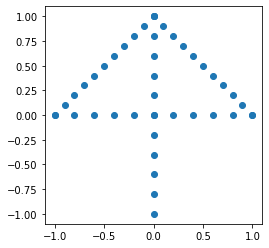

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(points[0, :], points[1, :])
ax.set_aspect('equal')
plt.show()

Let's use the function written for Problem 1-2, to rotate these set of points by $\theta$ degrees.

In [5]:
theta = 20.
points_rot = q1.rotate_2d(points, theta)

Now we visualize the points alongside their rotated versions.

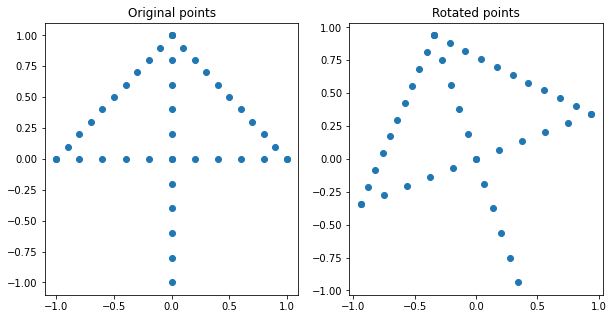

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(points[0, :], points[1, :])
axes[0].set_title('Original points')

axes[1].scatter(points_rot[0, :], points_rot[1, :])
axes[1].set_title('Rotated points')

plt.show()

You should observe that `points` are rotated counterclockwise by $\theta$ degrees around the origin.

## Problem 2: 3D rotations (25 points)

Similar to 2D rotation matrices, there are 3D rotation matrices that rotate points in 3D, i.e. $\mathbb{R}^3$. There are three basis 3D rotation matrices, that rotate about $x$-, $y$- and $z$- axes. These rotations matrices are denoted by $R_x(\theta)$, $R_y(\theta)$ and $R_z(\theta)$ and defined as:

\begin{align}
R_x(\theta) =   
\begin{bmatrix}
    1 & 0 & 0 \\
    0 & \cos \theta & -\sin \theta \\
    0 & \sin \theta & \cos \theta
\end{bmatrix}.
\label{eq:rotx_3d}
\tag 2
\end{align}

\begin{align}
R_y(\theta) =   
\begin{bmatrix}
    \cos \theta & 0 & \sin \theta \\
    0 & 1 & 0 \\
    -\sin \theta & 0 & \cos \theta
\end{bmatrix}.
\label{eq:roty_3d}
\tag 3
\end{align}

\begin{align}
R_z(\theta) =   
\begin{bmatrix}
    \cos \theta & -\sin \theta & 0 \\
    \sin \theta &  \cos \theta & 0 \\
    0 & 0 & 1
\end{bmatrix}.
\label{eq:rotz_3d}
\tag 4
\end{align}

Any rotation matrix can be obtained by combining three basis rotation matrices. There are different conventions for rotation matrices. To learn more about these conventions, you can check Wikipedia page on Euler angles.

Note that similar to the 2D case, the 3D rotation matrices are orthogonal, i.e. $R^T R = I$ and have determinant $1$.

### Problem 2-1: Construct basis 3D rotation matrices (15 points)

Write three functions which outputs basis rotation matrices $R_x(\theta)$, $R_y(\theta)$ and $R_z(\theta)$.
* The inputs to each of these functions are a single scalar value $\theta$.
* The output of each of these functions is a $3 \times 3$ numpy.ndarray matrix.

Add your code to `Question2.rotate_matrix_x`, `Question2.rotate_matrix_y` and `Question2.rotate_matrix_z` in `main.py`.

### Problem 2-2: Construct a rotation matrix (5 points)

Write a function that outputs the rotation matrix corresponding to the following sequence of rotations:

1- First, rotate around $z$ axis with $\alpha$ angle.

2- Next, rotate around $y$ axis with $\beta$ angle.

3- Finally, rotate around $z$ axis with $\gamma$ angle.

In short, the above sequence of rotations is $z-y-z$. Based on this definition:

* The function inputs are the three angles $(\alpha, \beta, \gamma)$ in degrees.
* The function's output is a $3 \times 3$ numpy.ndarray matrix.

Add your code to `Question2.rotate_matrix` in `main.py`.

### Problem 2-3: Rotate 3D points (5 points)

Write a function which rotates any number of $N$ points in $\mathbb{R}^3$, given the rotation matrix. 
The inputs of this function:
* A $3 \times N$ numpy.ndarray, containing N points distributed in 3D space. The first, second and third rows of this matrix correspond to the $x$, $y$ and $z$ coordinates. Also, each column corresponds to a point in 3D space.
* A $3 \times 3$ numpy.ndarray corresponding to the rotation matrix.

The output is:
* A $3 \times N$ numpy.ndarray, containing the rotated points

Add your code to `Question2.rotate_point` in `main.py`.

### Visualization: Rotating x-y plane

Let's define a set of points reguraly spaced on $x-y$ plane within $[-1, 1] \times [-1, 1]$ interval. Note that for any point on $x-y$ plane, the $z$-coordinate is $0$. 

In [7]:
# define the set of points on x-y plane
num_bins = 11
regular_grid = np.linspace(-1, 1, num_bins)
x_grid, y_grid = np.meshgrid(regular_grid, regular_grid)
points = np.concatenate((np.reshape(x_grid, [1, -1]),
                         np.reshape(y_grid, [1, -1]),
                         np.zeros((1, num_bins**2))), # the z coordinate is 0
                        axis=0)

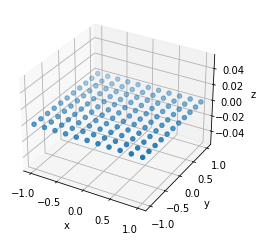

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[0, :], points[1, :], points[2, :])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Now, let's rotate the points defined on the x-y plane around $x$, $y$, $z$ coordinates. For this purpose we use the rotation matrices we defined earlier in Problem 2-1.

In [9]:
theta1 = 20.
theta2 = 90.
theta3 = -90.
R_x = q2.rotate_matrix_x(theta1)
R_y = q2.rotate_matrix_y(theta2)
R_z = q2.rotate_matrix_z(theta3)

# rotation around x coordinate
points_rot_x = q2.rotate_point(points, R_x)

# rotation around y coordinate
points_rot_y = q2.rotate_point(points, R_y)

# rotation around z coordinate
points_rot_z = q2.rotate_point(points, R_z)

Now, let's plot the rotated points to see the effect of each of the rotations:

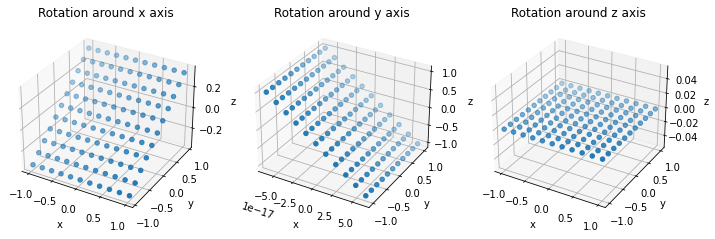

In [10]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(points_rot_x[0, :], points_rot_x[1, :], points_rot_x[2, :])
ax.set_title('Rotation around x axis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter(points_rot_y[0, :], points_rot_y[1, :], points_rot_y[2, :])
ax.set_title('Rotation around y axis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter(points_rot_z[0, :], points_rot_z[1, :], points_rot_z[2, :])
ax.set_title('Rotation around z axis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

## Problem 3: Central Slice Theorem (CST) in 2D (25 points)

Central slice theorem (CST) links the projections of objects in Fourier domain to the original object in Fourier domain. To state CST formally, let's first define a set of notations:
* The image denote by $f$, $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ 
* The projection operator $\mathcal{P}_\theta$ along $\theta$ direction (angle)
* The Fourier transform $\mathcal{F}$

Based on the above notations, CST states that:

\begin{align}
\{\mathcal{F} f\} (\xi \cos \theta, \xi \sin \theta) = (\mathcal{F} \mathcal{P}_\theta) (\xi)
\tag 5
\end{align}

On the left hand side of (5), in 2D Fourier space $(\xi \cos \theta, \xi \sin \theta)$ refers to the points that lie on a line with angle $\theta$ with respect to the $x$-axis. Note that this line can also be obtained by counterclockwise rotating the points on $x$-axis with $\theta$ angle (we learned about rotations before!). 

Now imagine, two set of grid points in 2D and 1D. The first 2D grid is a uniform grid where we have equal distance between two consecutive points in horizontal and vertical directions. The second 1D grid, corresponds to equally spaced points on $x$-axis (equal spacing between two consecutive points). Now, if we rotate the 1D grid by angle $\theta$ (for $\theta \neq 0, \frac{\pi}{2}, \pi, \frac{3 \pi}{2}$), then we observe the points on the rotated 1D grid, do not necessarily coincide with the points on the 2D uniform grid. This urges us to define the Fourier transform of the image on a non-uniform grid. We define the Fourier transform of the image $f$ (discretized on a $2 N+1 \times 2 N+1$ uniform grid) on any set of grid points $(k_x, k_y)$ as:

\begin{align}
\{\mathcal{F} f\} (k_x, k_y) = \sum\limits_{y=-N}^N \sum\limits_{x=-N}^N  f(x, y) \exp \left({- i \frac{2 \pi}{2N+1} (x k_x + y k_y)}\right) 
\tag 6
\end{align}

Based on how we define $(k_x, k_y)$ points, we obtain non-uniform Fourier transform of the image along the specified non-uniform grid. 

In this excercise, we want to check CST in 2D and how we can obtain projections from different directions using this theorem. To check your results, you can also use radon function provided in scikit-image library. For more details or examples, please refer to https://scikit-image.org/docs/dev/auto_examples/transform/plot_radon_transform.html.

Before we start the problems, let's first load the image that we will be working with thorughout this excercise. This image is a Shepp-Logan phantom of size $125 \times 125$.

Image size:(125, 125)


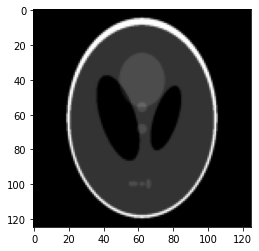

In [11]:
image = shepp_logan_phantom()
image = resize(image, (125, 125))
print("Image size:{0}".format(image.shape))
image_size = image.shape[0]

plt.figure()
plt.imshow(image, cmap='gray')
plt.show()

### Problem 3-1: Rotating $x$-axis (generating a non-uniform grid) (5 points)

Write a function that returns a non-uniform grid corresponding to the set of points on $x$-axis rotated by angle $\theta$ counterclockwise. Define the grid such that the maximum and minimum of the grid you define on x-axis (before rotation) is $-N$ and $N$ (for an image size of $2 N + 1 \times 2 N + 1$).

The inputs:
* Image size ($2 N + 1$ in definition (6))
* The rotation angle $\theta$

The output:
* A numpy.ndarray of length $2 N + 1$, containing the rotated $x$-axis by $\theta$ angle.

Hint: You can re-use the functions you wrote in problem 1.

Add your code to `Question3.rotate_x_axis` in `main.py`.

### Problem 3-2: Non-uniform Fourier transform in 2D (10 points)

Now, given the set of non-uniform grid points output from the function define in Problem 3-1, write a function that takes the non-uniform Fourier transform of the image along a non-uniform grid.

The inputs:
* The image. A np.ndarray of size $2 N + 1 \times 2 N + 1$.
* Grid points along which we want to take the Fourier transform (i.e. $k_x, k_y$ points in (6)). It is numpy.ndarray of size $2 \times M$ where $M$ refers to the number of points on the non-uniform grid.

The output:
* The Fourier transform of the image along the input grid points. It will be a numpy.ndarray of length $M$ with complex values.

Add your code to `Question3.nudft2` in `main.py`. Avoid using nested for loops.

### Problem 3-3: Generate projections using CST (10 points)

For a given projection angle $\theta$, write a function that outputs the projection of the input image along angle $\theta$.

The inputs:
* The image of size $2 N + 1 \times 2 N + 1$
* Projection angle $\theta$ in degrees

The outputs:
* Projection, a np.ndarray vector of length $2 N + 1$.

Add your code to `Question3.gen_projection` in `main.py`.

### Visualization: Generate sinogram

A set of projections from different angles organized in 2D is called a sinogram. To obtain the sinogram of the Shepp-Logan image, we generate the projections of the image along equi-spaced angles defined in $[0, 2 \pi)$ interval. Check the code snippet below. You can compare your results with the ones you obtain from using `radon` function in `scikit-image` library (https://scikit-image.org/docs/dev/auto_examples/transform/plot_radon_transform.html)

In [12]:
# generate sinogram
theta = np.linspace(0, 360, 360)
sinogram = np.zeros((image_size, len(theta)))
for i in range(len(theta)):
    sinogram[:, i] = q3.gen_projection(image, theta[i])

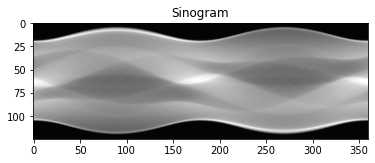

In [13]:
plt.figure()
plt.imshow(sinogram, cmap='gray')
plt.title('Sinogram')
plt.show()

## Problem 4: Cryo-EM projection generation (20 points)

In this problem, we study the forward model in a Cryo-electron microscopy setup. Let's assume we have a density map $V: \mathbb{R}^3 \rightarrow \mathbb{R}$. A projection image from $\omega$ view from this volume is generated following:
\begin{align}
\zeta(x, y) = \{h * \mathcal{P}_\theta V\}(x, y) + \varepsilon(x, y)
\tag 7
\end{align}
where $\{\mathcal{P}_\theta V\}(x, y) = \int V(R_\theta^T \textbf{x}) dz$, $\textbf{x} = [x, y, z]^T$ and $h$ is the contrast transfer function of the microscope. So, what the projection operator $\mathcal{P}_\theta$ does is to rotate the volume based on $R_\theta$ rotation matrix. Then, it takes the line integrals along the $\mathbf{z}$ direction. In this excersize, the projection operator, maps a 3D volume of size $L \times L \times L$ to a 2D projection image of size $L \times L$. Finally, $\varepsilon$ in (7) refers to iid Gaussian additive noise with $\varepsilon(x, y) \sim \mathcal{N}(0, \sigma^2)$.

In this excercise, given a projection view defined through the corresponding rotation matrix $R_\theta$, we generate a projection image following (7). We have provided a 3D volume for this excercise. The volume is given in `vol.mat`. Below, we load this volume and visualize it.

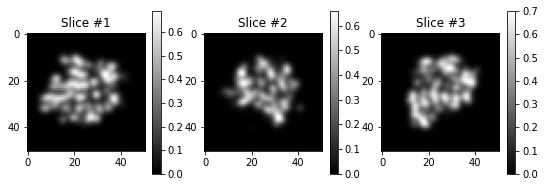

In [14]:
import scipy.io
import plotly.graph_objects as go

# load and vizualize volume
vol = scipy.io.loadmat('vol.mat')['vol']
vol_sz = vol.shape[0]

# the grid that the volume is defined on
num_bins = vol.shape[0]
regular_grid = np.linspace(-num_bins//2+1, num_bins//2, num_bins)
x_grid, y_grid, z_grid = np.meshgrid(regular_grid, regular_grid, regular_grid)

# plot different slices of the volume (NOTE: this is different from projection!!)
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
im = axes[0].imshow(vol[vol_sz//2, :, :], cmap='gray')
axes[0].set_title('Slice #1')
fig.colorbar(im, ax=axes[0], orientation='vertical')

im = axes[1].imshow(vol[:, vol_sz//2, :], cmap='gray')
axes[1].set_title('Slice #2')
fig.colorbar(im, ax=axes[1], orientation='vertical')

im = axes[2].imshow(vol[:, :, vol_sz//2], cmap='gray')
axes[2].set_title('Slice #3')
fig.colorbar(im, ax=axes[2], orientation='vertical')

plt.show()

# 3D plot of the volume
fig = go.Figure(data=go.Volume(x=x_grid.flatten(), 
                               y=y_grid.flatten(), 
                               z=z_grid.flatten(), 
                               value=vol.flatten(),
                               isomin=0,
                               isomax=vol.max(),
                               opacity=0.1,
                               surface_count=25))

# Feel free to rotate the volume and examine it from different views!
# fig.show()

### Problem 4-1: Non-uniform discrete Fourier transform (NUDFT) in 3D (10 points)
NUDFT in 3D is very similar to the 2D version, except that we have three dimensions here instead of two. We define the Fourier transform of the volume $V$ (discretized on a $2 N+1 \times 2 N+1 \times 2N+1$ uniform grid, $L=2N+1$) on any set of grid points $(k_x, k_y, k_z)$ as:

\begin{align}
\{\mathcal{F} V\} (k_x, k_y, k_z) = \sum\limits_{x=-N}^N \sum\limits_{y=-N}^N \sum\limits_{z=-N}^N  V(x, y, z) \exp \left({- i \frac{2 \pi}{2 N + 1} (x k_x + y k_y + z k_z)}\right) 
\tag 8
\end{align}

Based on how we define the $(k_x, k_y, k_z)$, we can obtain the Fourier transform of the volume along any given grid specified by $(k_x, k_y, k_z)$ points. 

Using the defintion (8) and similar to what you implemented for the 2D case, write a function that takes NUDFT of a 3D signal.

Inputs:
* a 3D numpy.ndarray of size $L \times L \times L$. For the volume provided in this excercise, $L=51$ and $N=25$.
* Grid points along which we want to take the Fourier transform (i.e. $k_x, k_y, k_z$ points in (8)). It is numpy.ndarray of size $3 \times M$ where $M$ refers to the number of points on the grid.

The output:
* The Fourier transform of the volume along the input grid points. It will be a numpy.ndarray of length $M$ with complex values.

Add your code to `Question4.nudft3` in `main.py`. Avoid using nested for loops.

### Problem 4-2: Projection of $V$ along $\theta$ direction (10 points)
For this excercise, we use central slice theorem (CST) to generate one projection image. For this purpose, we need to follow the below steps:
* Consider a cartesian grid corresponding to the $x-y$ plane (Problem 2). We first rotate this grid based on the rotation matrix $R_\theta$ (you learned about this in problem 2).
* Next, you use this rotated grid and compute the non-uniform discrete Fourier transform of the volume $V$ on this rotated grid (similar to problem 3-2, this time applied for 3D). You take the inverse Fourier transform of the result to get the projection in spatial domain.

Based on the above description, write a function that generates a projection image given the corresponding rotation matrix $R_\theta$.

Inputs:
* $V$ a 3D numpy.ndarray of size $L \times L \times L$. For the volume provided in this excercise, $L=51$.
* $R_\theta$ a $3 \times 3$ rotation matrix.

Output:
* Projection image of size $L \times L$.

Add your code to `Question4.gen_projection` in `main.py`.

Use the following code snippet to test and visualize the projections you generated.

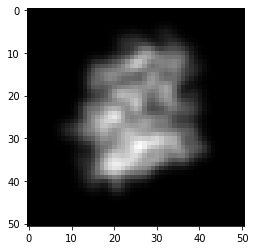

In [15]:
# Generate a random projection matrix (feel free to try different rotation matrices by changing alpha, beta, gamma)
alpha = 30.
beta = 90.
gamma = 90.
R_theta = q2.rot_matrix(alpha, beta, gamma)

# Generate projection image
proj_img = q4.gen_projection(vol, R_theta)

plt.figure()
plt.imshow((proj_img), cmap='gray')
plt.show()

### Visualization: Checking the effect of CTF
To visualize the effect of CTF, in 'ctf.mat' we have provided for different CTFs corresponding to different defocus levels. In the below code snippet, we load these CTFs. Note that the CTFs are in Fourier domain.

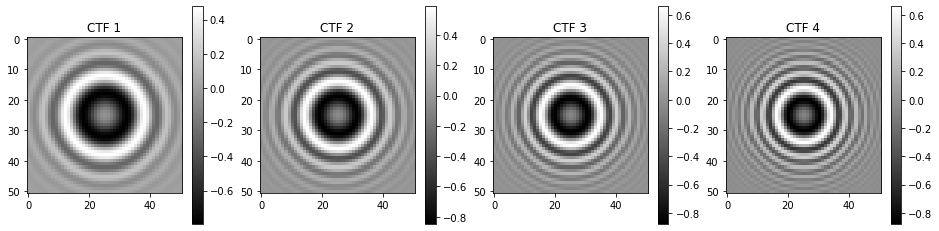

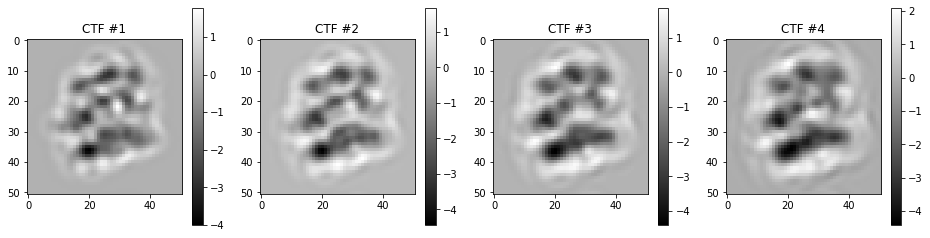

In [16]:
ctfs = scipy.io.loadmat('ctf.mat')
ctf1 = ctfs['ctf1'] # defocus 1 micrometers
ctf2 = ctfs['ctf2'] # defocus 1.2 micrometers
ctf3 = ctfs['ctf3'] # defocus 1.4 micrometers
ctf4 = ctfs['ctf4'] # defocus 1.6 micrometers

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
im = axes[0].imshow(ctf1, cmap='gray')
axes[0].set_title('CTF 1')
fig.colorbar(im, ax=axes[0], orientation='vertical')

im = axes[1].imshow(ctf2, cmap='gray')
axes[1].set_title('CTF 2')
fig.colorbar(im, ax=axes[1], orientation='vertical')

im = axes[2].imshow(ctf3, cmap='gray')
axes[2].set_title('CTF 3')
fig.colorbar(im, ax=axes[2], orientation='vertical')

axes[3].imshow(ctf4, cmap='gray')
axes[3].set_title('CTF 4')
fig.colorbar(im, ax=axes[3], orientation='vertical')

# Check how defocus is changing the CTF!!

# Apply CDF to the projection image (NOTE: use the given function in q4.apply_ctf(proj_img, ctf))
cm1 = q4.apply_ctf(proj_img, ctf1)
cm2 = q4.apply_ctf(proj_img, ctf2)
cm3 = q4.apply_ctf(proj_img, ctf3)
cm4 = q4.apply_ctf(proj_img, ctf4)
                  
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
im = axes[0].imshow(cm1, cmap='gray')
axes[0].set_title('CTF #1')
fig.colorbar(im, ax=axes[0], orientation='vertical')

im = axes[1].imshow(cm2, cmap='gray')
axes[1].set_title('CTF #2')
fig.colorbar(im, ax=axes[1], orientation='vertical')

im = axes[2].imshow(cm3, cmap='gray')
axes[2].set_title('CTF #3')
fig.colorbar(im, ax=axes[2], orientation='vertical')

im = axes[3].imshow(cm4, cmap='gray')
axes[3].set_title('CTF #4')
fig.colorbar(im, ax=axes[3], orientation='vertical')

plt.show()

### Visualization: Add noise (finally!)

To generate a noisy image, we sample a noise image based on additive iid Gaussian distribution where for each pixel $(x, y)$, $\varepsilon(x, y) \sim \mathcal{N}(0, \sigma^2)$. To visualize the effect of noise, use the below code snippet:

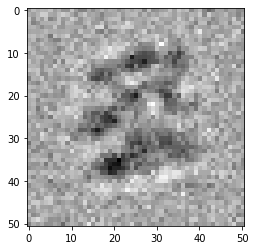

In [17]:
sigma = 0.5
noisy_proj = cm1 + sigma * np.random.normal(size=proj_img.shape)

plt.figure()
plt.imshow(noisy_proj, cmap='gray')
plt.show()

## And this concludes Lab 10! Congratulations!